In [1]:
import pandas as pd

In [2]:
test_data = pd.DataFrame(
    [
        {"RowNumber":138,"CustomerId":15610156,"Surname":"Ma","CreditScore":637,"Geography":"France","Gender":"Male","Age":40,"Tenure":2,"Balance":133463.1,"NumOfProducts":1,"HasCrCard":0,"IsActiveMember":1,"EstimatedSalary":93165.34,"Exited":0},
        {"RowNumber":3103,"CustomerId":15660866,"Surname":"Chimaobim","CreditScore":640,"Geography":"France","Gender":"Female","Age":29,"Tenure":3,"Balance":0.0,"NumOfProducts":2,"HasCrCard":1,"IsActiveMember":0,"EstimatedSalary":2743.69,"Exited":0},
        {"RowNumber":1575,"CustomerId":15693018,"Surname":"Ermakova","CreditScore":678,"Geography":"Germany","Gender":"Male","Age":23,"Tenure":10,"Balance":115563.71,"NumOfProducts":1,"HasCrCard":1,"IsActiveMember":1,"EstimatedSalary":91633.53,"Exited":0},
        {"RowNumber":7914,"CustomerId":15649450,"Surname":"Repina","CreditScore":805,"Geography":"Germany","Gender":"Male","Age":24,"Tenure":6,"Balance":143221.35,"NumOfProducts":2,"HasCrCard":1,"IsActiveMember":0,"EstimatedSalary":186035.72,"Exited":0},
        {"RowNumber":7565,"CustomerId":15759387,"Surname":"McIntosh","CreditScore":598,"Geography":"Germany","Gender":"Male","Age":38,"Tenure":1,"Balance":101487.18,"NumOfProducts":1,"HasCrCard":1,"IsActiveMember":1,"EstimatedSalary":75959.1,"Exited":1},
        {"RowNumber":4546,"CustomerId":15667476,"Surname":"Cox","CreditScore":477,"Geography":"Germany","Gender":"Female","Age":36,"Tenure":3,"Balance":117700.86,"NumOfProducts":1,"HasCrCard":0,"IsActiveMember":0,"EstimatedSalary":74042.0,"Exited":0},
        {"RowNumber":7609,"CustomerId":15598574,"Surname":"Uwakwe","CreditScore":695,"Geography":"Spain","Gender":"Female","Age":31,"Tenure":5,"Balance":0.0,"NumOfProducts":2,"HasCrCard":0,"IsActiveMember":1,"EstimatedSalary":13998.88,"Exited":0},
        {"RowNumber":6122,"CustomerId":15607629,"Surname":"Hollis","CreditScore":679,"Geography":"France","Gender":"Male","Age":48,"Tenure":8,"Balance":0.0,"NumOfProducts":2,"HasCrCard":1,"IsActiveMember":0,"EstimatedSalary":23344.94,"Exited":0},
        {"RowNumber":6813,"CustomerId":15605059,"Surname":"Mackie","CreditScore":576,"Geography":"Germany","Gender":"Male","Age":63,"Tenure":3,"Balance":148843.56,"NumOfProducts":1,"HasCrCard":1,"IsActiveMember":0,"EstimatedSalary":69414.13,"Exited":1},
        {"RowNumber":9809,"CustomerId":15581115,"Surname":"Middleton","CreditScore":603,"Geography":"France","Gender":"Female","Age":39,"Tenure":9,"Balance":76769.68,"NumOfProducts":1,"HasCrCard":0,"IsActiveMember":0,"EstimatedSalary":48224.72,"Exited":0},
        {"RowNumber":19809,"CustomerId":15581125,"Surname":"Middleton","CreditScore":783,"Geography":"France","Gender":"Female","Age":44,"Tenure":3,"Balance":176769.68,"NumOfProducts":2,"HasCrCard":1,"IsActiveMember":1,"EstimatedSalary":98224.72,"Exited":0},
        {"RowNumber":7546,"CustomerId":15667479,"Surname":"Altor","CreditScore":577,"Geography":"Germany","Gender":"Female","Age":26,"Tenure":4,"Balance":11770.86,"NumOfProducts":2,"HasCrCard":0,"IsActiveMember":0,"EstimatedSalary":274042.0,"Exited":0},
        {"RowNumber":7646,"CustomerId":15667478,"Surname":"Bocx","CreditScore":800,"Geography":"France","Gender":"Male","Age":69,"Tenure":2,"Balance":0.0,"NumOfProducts":1,"HasCrCard":1,"IsActiveMember":0,"EstimatedSalary":54042.0,"Exited":0},
        {"RowNumber":7746,"CustomerId":15667477,"Surname":"Withr","CreditScore":477,"Geography":"Germany","Gender":"Male","Age":49,"Tenure":3,"Balance":13466.98,"NumOfProducts":1,"HasCrCard":1,"IsActiveMember":1,"EstimatedSalary":78042.0,"Exited":0},
        {"RowNumber":7846,"CustomerId":15667476,"Surname":"Bart","CreditScore":597,"Geography":"Germany","Gender":"Female","Age":39,"Tenure":1,"Balance":100200.12,"NumOfProducts":3,"HasCrCard":0,"IsActiveMember":1,"EstimatedSalary":100042.0,"Exited":0},
        {"RowNumber":7946,"CustomerId":15667475,"Surname":"Mertin","CreditScore":677,"Geography":"Spain","Gender":"Male","Age":29,"Tenure":4,"Balance":1345.12,"NumOfProducts":2,"HasCrCard":1,"IsActiveMember":1,"EstimatedSalary":94042.0,"Exited":0},
        {"RowNumber":7106,"CustomerId":15667474,"Surname":"Deuix","CreditScore":777,"Geography":"Germany","Gender":"Female","Age":19,"Tenure":1,"Balance":91770.86,"NumOfProducts":1,"HasCrCard":1,"IsActiveMember":0,"EstimatedSalary":34042.0,"Exited":0},
    ]
)

test_unique = pd.DataFrame(
        {"RowNumber":7546,"CustomerId":15667479,"Surname":"Deuix","CreditScore":577,"Geography":"Germany","Gender":"Female","Age":79,"Tenure":1,"Balance":191770.86,"NumOfProducts":1,"HasCrCard":1,"IsActiveMember":0,"EstimatedSalary":34042.0,"Exited":0}, index=[0]
    )

In [3]:
test_unique

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,7546,15667479,Deuix,577,Germany,Female,79,1,191770.86,1,1,0,34042.0,0


In [4]:
import pandas as pd
import joblib

# Load Dataset
df = test_data#pd.read_csv('../data/churn.csv')

# Balance per age
df['BalancePerAge'] = round(df['Balance'] / df['Age'], 2)

# Excluded Columns - "Surname", "Balance", "Exited", "MeanSalary"
df = df[
    ['CreditScore', 'Geography', 'Gender', 'Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember','EstimatedSalary', 'BalancePerAge']
]

# Load Model
pipeline = joblib.load('../models/CBC_model_C3_pipeline.joblib')

# Predict Churn Probability
#pipeline.predict_proba(df)

# Create a churn probability column
test_data['ExitedProba'] = [round((p * 100), 2) for i, p in pipeline.predict_proba(df).tolist()]

# Create minimum revenue (15% of the Estimated Salary)
test_data['RevenueEtimative'] = df['EstimatedSalary'] * 0.15
test_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalancePerAge,ExitedProba,RevenueEtimative
0,138,15610156,Ma,637,France,Male,40,2,133463.10,1,0,1,93165.34,0,3336.58,7.18,13974.8010
1,3103,15660866,Chimaobim,640,France,Female,29,3,0.00,2,1,0,2743.69,0,0.00,0.41,411.5535
2,1575,15693018,Ermakova,678,Germany,Male,23,10,115563.71,1,1,1,91633.53,0,5024.51,1.02,13745.0295
3,7914,15649450,Repina,805,Germany,Male,24,6,143221.35,2,1,0,186035.72,0,5967.56,2.05,27905.3580
4,7565,15759387,McIntosh,598,Germany,Male,38,1,101487.18,1,1,1,75959.10,1,2670.72,49.35,11393.8650
5,4546,15667476,Cox,477,Germany,Female,36,3,117700.86,1,0,0,74042.00,0,3269.47,17.55,11106.3000
6,7609,15598574,Uwakwe,695,Spain,Female,31,5,0.00,2,0,1,13998.88,0,0.00,2.95,2099.8320
7,6122,15607629,Hollis,679,France,Male,48,8,0.00,2,1,0,23344.94,0,0.00,5.10,3501.7410
8,6813,15605059,Mackie,576,Germany,Male,63,3,148843.56,1,1,0,69414.13,1,2362.60,95.51,10412.1195
9,9809,15581115,Middleton,603,France,Female,39,9,76769.68,1,0,0,48224.72,0,1968.45,15.51,7233.7080


In [5]:
# For unique values
import pandas as pd
import joblib

# Load Dataset
df = test_unique#pd.read_csv('../data/churn.csv')

# Balance per age
df['BalancePerAge'] = round(df['Balance'] / df['Age'], 2)

# Excluded Columns - "Surname", "Balance", "Exited", "MeanSalary"
df = df[
    ['CreditScore', 'Geography', 'Gender', 'Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember','EstimatedSalary', 'BalancePerAge']
]

# Load Model
pipeline = joblib.load('../models/CBC_model_C3_pipeline.joblib')

# Predict Churn Probability
#pipeline.predict_proba(df)

# Create a churn probability column
df['ExitedProba'] = [round((p * 100), 2) for i, p in pipeline.predict_proba(df).tolist()]

# Create minimum revenue (15% of the Estimated Salary)
df['RevenueEtimative'] = df['EstimatedSalary'] * 0.15
df

/opt/anaconda3/envs/pa03/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalancePerAge,ExitedProba,RevenueEtimative
0,577,Germany,Female,79,1,191770.86,1,1,0,34042.0,2427.48,16.39,5106.3


In [1]:
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Wedge, Rectangle

In [2]:
def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [3]:
def gauge(labels=['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME'], colors='jet_r', cat=1, title='', fname='./meter.png'): 
    
    """
    some sanity checks first
    
    """
    
    N = len(labels)
    
    if cat > N: 
        raise Exception("\n\nThe category ({}) is greated than the length\nof the labels ({})".format(cat, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(cat - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    fig.savefig(fname, dpi=200)

AttributeError: 'NoneType' object has no attribute 'dtypes'

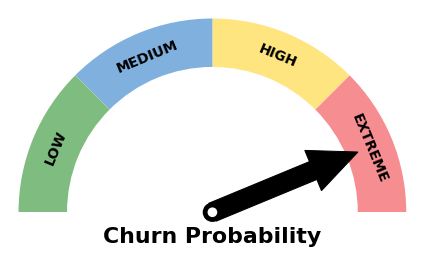

In [23]:
prob = 76

gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
        colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], cat=4, title='Churn Probability', fname='./gauge.png')

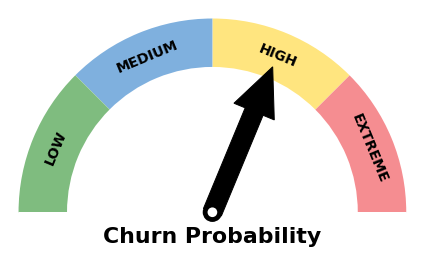

In [20]:
if prob < 40:
    gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
        colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], cat=1, title='Churn Probability', fname='./gauge.png')
elif 40 <= prob < 60:
    gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
        colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], cat=2, title='Churn Probability', fname='./gauge.png')
elif 60 <= prob < 80:
    gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
        colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], cat=3, title='Churn Probability', fname='./gauge.png')
else:
    gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
        colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], cat=4, title='Churn Probability', fname='./gauge.png')